# Dendrograms Comparison

This notebook demonstrates how to use dendrograms to visualize hierarchical clustering with different linkage methods.

## Import Required Libraries

Import the necessary libraries including matplotlib, numpy, pandas, and scipy.

In [1]:
# Import the required libraries.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

## Load Dataset

Load the social media and exercise dataset for clustering analysis.

In [2]:
# Seed for reproducibility.
np.random.seed(42)

# Load the data.
df = pd.read_csv("./data/social_media_exercise.csv")

# Define the methods to be used for linkage.
methods = ["single", "complete", "average", "weighted", "centroid", "ward"]

## Compare Linkage Methods with Dendrograms

Create dendrograms for each linkage method to compare hierarchical clustering approaches.

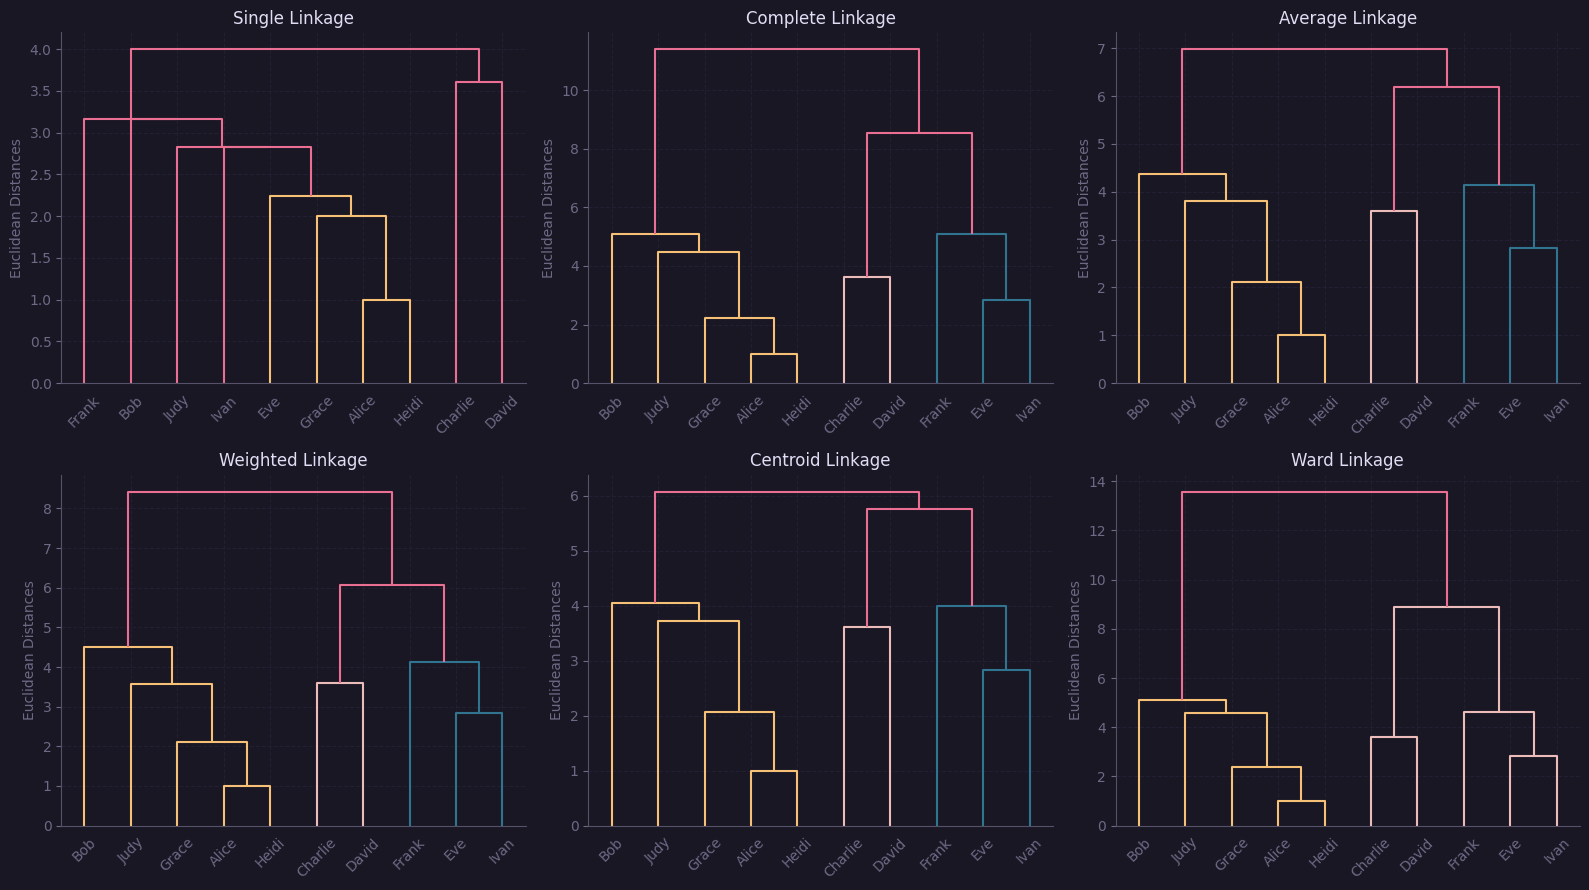

In [3]:
# Plotting the distributions.
with plt.style.context("./themes/rose-pine.mplstyle"):

    # Create a figure with 2x3 subplots.
    fig, axes = plt.subplots(2, 3, figsize=(16, 9))

    # Loop through each method and plot the corresponding dendrogram.
    for ax, method in zip(axes.flatten(), methods):

        # Perform hierarchical/agglomerative clustering.
        Z = linkage(df[["social_media", "physical_exercise"]], method=method)
        
        # Plot the dendrogram.
        dendrogram(
            Z, labels=df["name"].values,
            distance_sort="ascending", show_leaf_counts=True,
            ax=ax
        )
        
        ax.set_title(f"{method.capitalize()} Linkage")
        ax.set_ylabel("Euclidean Distances")
        ax.grid(True, linestyle="--", alpha=0.7)
        ax.tick_params(axis="x", rotation=45, labelsize=10)

    plt.tight_layout()
    plt.show()

## Visualize Clustering Results

Create scatter plots showing the actual clustering results for each linkage method.

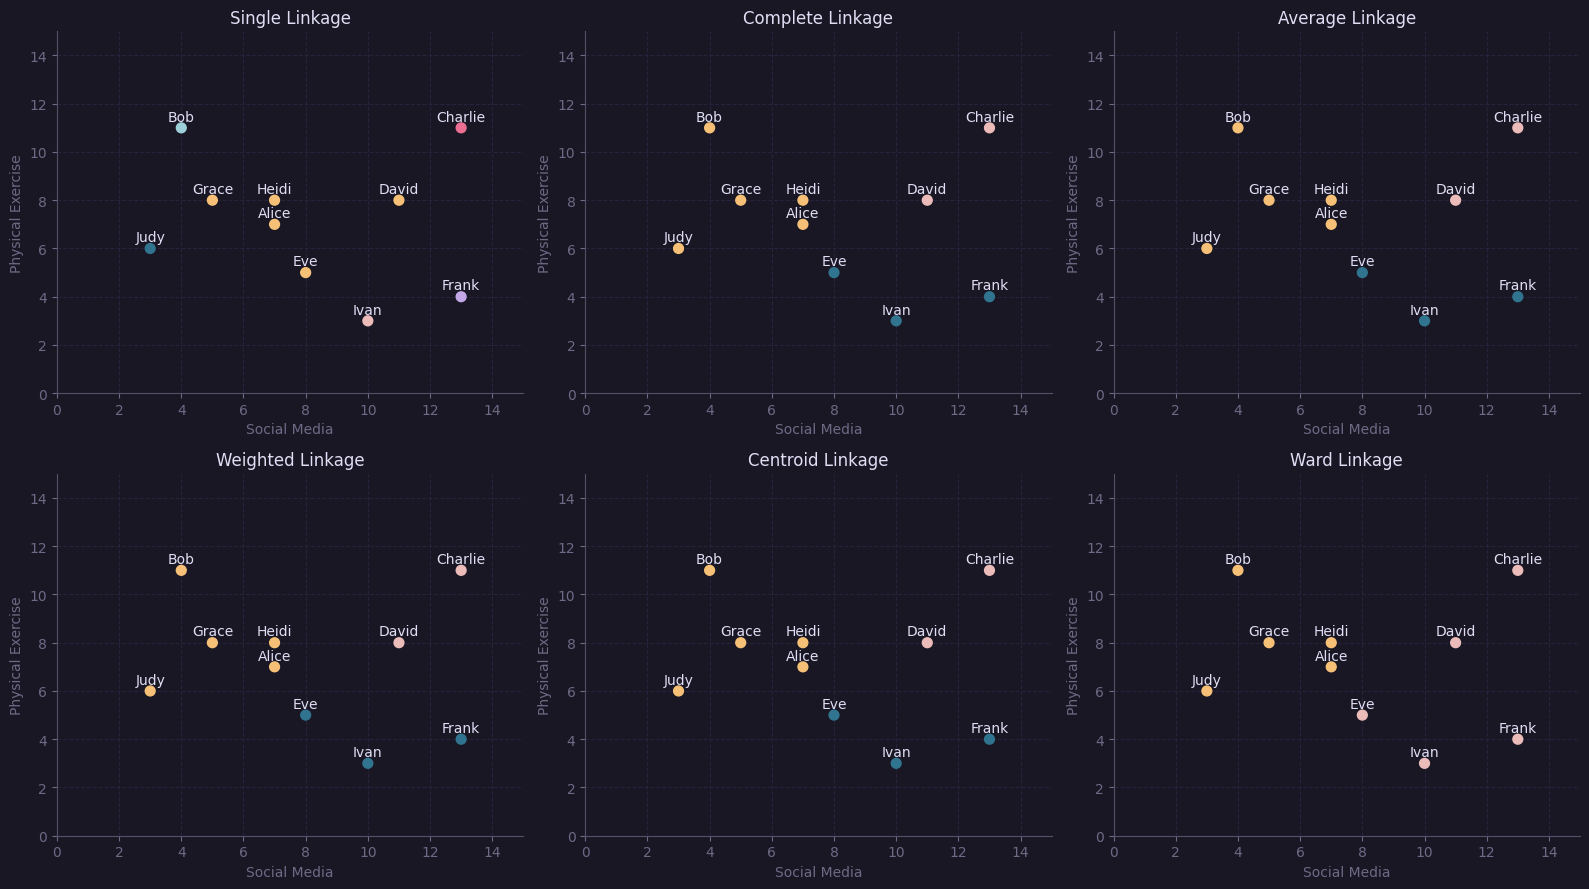

In [4]:
with plt.style.context("./themes/rose-pine.mplstyle"):

    # Define the distances and colors to be used for clustering.
    distances = [2.5, 6, 5, 5, 5, 10]
    colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

    # Create a figure with 2x3 subplots for scatter plots.
    fig, axes = plt.subplots(2, 3, figsize=(16, 9))

    # Loop through each method and plot the corresponding scatter plot.
    for ax, method, distance in zip(axes.flatten(), methods, distances):

        # Perform hierarchical/agglomerative clustering.
        Z = linkage(df[["social_media", "physical_exercise"]], method=method)
        
        # Assign cluster labels.
        clusters = fcluster(Z, t=distance, criterion="distance")
        
        # Plot the scatter plot using the colors defined in rose-pine.mplstyle.
        ax.scatter(
            df["social_media"], df["physical_exercise"],
            c=[colors[i % len(colors)] for i in clusters], s=50
        )

        # Annotate the points with the names.
        for i, name in enumerate(df["name"]):
            ax.annotate(
                name,
                (df["social_media"][i], df["physical_exercise"][i] + 0.3), ha="center"
            )

        ax.set_title(f"{method.capitalize()} Linkage")
        ax.set_xlabel("Social Media")
        ax.set_ylabel("Physical Exercise")
        ax.grid(True, linestyle="--")
        ax.set_xlim(0, 15)
        ax.set_ylim(0, 15)

    plt.tight_layout()
    plt.show()